Orginal cities {(1.0269617979751384, 0.5468533857712885), (0.5843940575417541, 0.7993281699707253), (0.32732145173304733, 0.6007800891728722), (0.8144822432286972, 0.39624247960919856), (0.7580617440461807, 0.46236847832554256), (0.6887566052834235, 0.428867247385919), (0.39419758531406063, 0.6006726654512233), (0.8250462311890073, 0.2330133936124944), (0.8430998028652389, 0.7905058523358761), (0.8782755704656973, 0.3736010316247648), (0.791283534807901, 0.6125680742134452), (0.8943173304802422, 0.3286345545151939), (0.5628812424062051, 0.23267903985635727), (0.9632307607936839, 0.45864878608148213), (0.39472324728756747, 0.8964174455928068), (0.8002789442645796, 0.46297879706559963), (0.3888916022773442, 0.4010967812766227), (0.6506640939125439, 0.057734525843442186), (0.17170101642831417, 0.5948769798034442), (0.8063742619927915, 0.46503579320965777), (0.38380728213154547, 0.413182483377615), (0.3578544095706856, 0.553806025878289), (0.7825575513156572, 0.8365301853839167), (0.777122

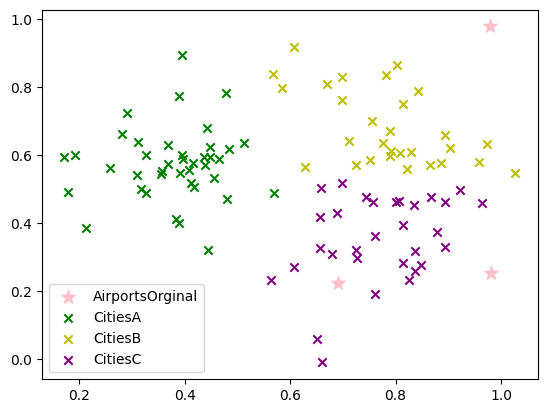

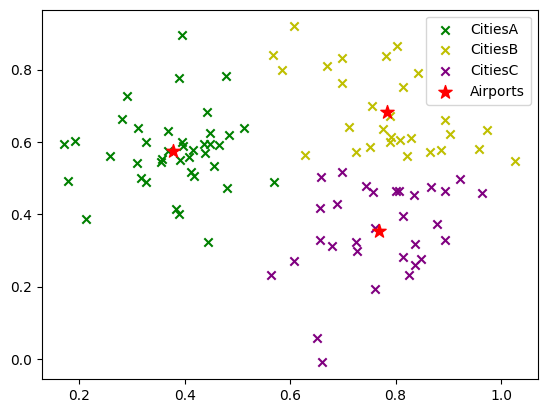

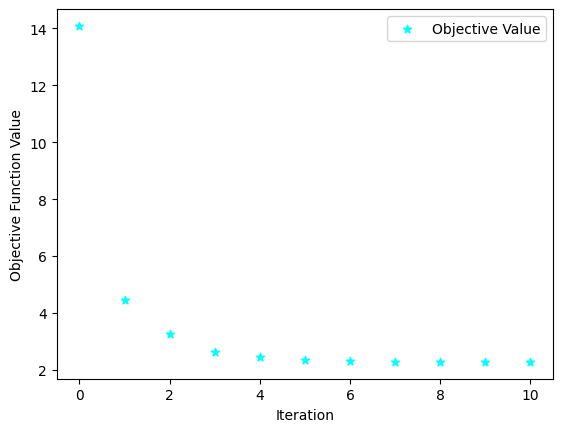

In [73]:
import math
import random
import numpy as np


def findClosestCity(cities, airports, cityA, cityB, cityC):

    #Empty sets
    cityA.clear()
    cityB.clear()
    cityC.clear()

    #For all cities
    for city in cities:

        cityXCord = city[0]
        cityYCord = city[1]
        distance = 100000000
        airportNum = -1

        #For each airport see which is closest to city
        for i in range (num_air):

            airportXCord = airports[i][0]
            airportYCord = airports[i][1]

            #Distance formula
            tempCal = math.sqrt( (airportXCord - cityXCord)**2 + (airportYCord - cityYCord)**2 )

            #Found an airport closer to city
            if(tempCal < distance):
                distance = tempCal
                airportNum = i


        if(airportNum == 0):
            cityA.add(city)

        if(airportNum == 1):
            cityB.add(city)

        if(airportNum == 2):
            cityC.add(city)


#Calculates the objective funciton value
def objectiveFunct(closeCityList, airports):
    totalDistance = 0

    #For each airport
    for i in range(len(airports)):

        airportXCord = airports[i][0]
        airportYCord = airports[i][1]


        #For each set of cities closest to an airport
        for city in closeCityList[i]:
            cityXCord = city[0]
            cityYCord = city[1]

            x = (airportXCord - cityXCord)**2
            y = (airportYCord - cityYCord)**2
            totalDistance = totalDistance + x + y


    return totalDistance


#Random restart function for when stuck in local minima
def restartAirportLocations(airports, numAirports):
    for i in range(numAirports):
        x = random.random()
        y = random.random()
        airports[i] = ((x,y))



num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y))


#Create set of cities for closest airport
cityA = set()
cityB = set()
cityC = set()

closeCityList = []
closeCityList.append(cityA)
closeCityList.append(cityB)
closeCityList.append(cityC)

#findClosestCity(cities, airports, cityA, cityB, cityC)
#val = objectiveFunct(closeCityList, airports)
#print('obj val: ', val)

#Array of the objective values calculated
objVals = []
prevObjVal = 10000

#Hold orginal airport locations
temp1 = airports[0]
temp2 = airports[1]
temp3 = airports[2]
airportOrgin = []
airportOrgin.append(temp1)
airportOrgin.append(temp2)
airportOrgin.append(temp3)


#Check the objective function value changes
change = 10
iteration = 0
alpha = 0.01

print('Orginal cities', cities)
print('Orginal airports: ', airports)

#Repeat objective function till minimal change
while (change > 0.0001):

    #Group together cities closest to a specific airport
    findClosestCity(cities, airports, cityA, cityB, cityC)
    print('length of cityA', len(cityA))

    #Calculate objective function value
    val = objectiveFunct(closeCityList, airports)
    objVals.append((iteration, val))
    iteration = iteration + 1

    #Check to see if converge to solution
    change = abs(val - prevObjVal)
    prevObjVal = val

    #For each airport
    for i in range(len(airports)):
        airportXCord = airports[i][0]
        airportYCord = airports[i][1]

        #Calculate summations for each individual city and individual axis
        summationX = 0
        summationY = 0

        #For each city closest to a particular airport
        for city in closeCityList[i]:
            cityXCord = city[0]
            cityYCord = city[1]

            summationX = summationX + (airportXCord - cityXCord)
            summationY = summationY + (airportYCord - cityYCord)

        #After completing summations, multiply by 2 for partial derivatives
        gradientX = summationX * 2
        gradientY = summationY * 2
        #print('PREgradients for airport ', i , ' ', gradientX, gradientY)

        #Multiply with small constant
        gradientX = gradientX * alpha
        gradientY = gradientY * alpha

        #Possible Test
        #gradientX = airportXCord * gradientX
        #gradientY = airportYCord * gradientY

        print('gradients for airport ', i , ' ', gradientX, gradientY)
        #airports[i] = (gradientX, gradientX)

        #Update location of airport
        newLocX = airportXCord - gradientX
        newLocY = airportYCord - gradientY
        airports[i] = (newLocX, newLocY)


        #Stuck in local minima, reset airport locaitons
        if( (len(cityA) == 0) | (len(cityB) == 0) | (len(cityC) == 0) ):
            restartAirportLocations(airports, num_air)
            print('restart airport locations')
            print()
            print()
            print()

    print('airports: ', airports)


    #if(iteration == 10):
        #change = 0



findClosestCity(cities, airports, cityA, cityB, cityC)
val = objectiveFunct(closeCityList, airports)
print(val)


print ('final airport cords', airports)
print('final cities:',cities)
print('cityA: ', cityA)
print('cityB: ', cityB)
print('cityC: ', cityC)



import matplotlib.pyplot as plt


#Orginal state
plt.figure(3)
zip_airsOrgin = zip(*airportOrgin)
plt.scatter(*zip_airsOrgin, marker='*', color='pink', s=100, label='AirportsOrginal')

zip_citiesA = zip(*cityA)
if(len(cityA) != 0):
    plt.scatter(*zip_citiesA, marker='x',color='green', label='CitiesA')

zip_citiesB = zip(*cityB)
if(len(cityB) != 0):
    plt.scatter(*zip_citiesB, marker='x',color='y', label='CitiesB')

zip_citiesC = zip(*cityC)
if(len(cityC) != 0):
    plt.scatter(*zip_citiesC, marker='x',color='purple', label='CitiesC')

#zip_cities = zip(*cities)
#plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
plt.legend()

#Plot figure for locations
plt.figure(1)
zip_citiesA = zip(*cityA)
if(len(cityA) != 0):
    plt.scatter(*zip_citiesA, marker='x',color='green', label='CitiesA')

zip_citiesB = zip(*cityB)
if(len(cityB) != 0):
    plt.scatter(*zip_citiesB, marker='x',color='y', label='CitiesB')

zip_citiesC = zip(*cityC)
if(len(cityC) != 0):
    plt.scatter(*zip_citiesC, marker='x',color='purple', label='CitiesC')

#zip_cities = zip(*cities)
#plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')

#zip_airsOrgin = zip(*airportOrgin)
#plt.scatter(*zip_airsOrgin, marker='*', color='pink', s=100, label='AirportsOrginal')
#plt.scatter(airports[0][0], airports[0][1], marker='*', color='blue', s=100, label='AirportsA')
plt.legend()


#Plot figure for objective values
plt.figure(2)
zip_objFuncVal = zip(*objVals)
plt.scatter(*zip_objFuncVal, marker='*',color='cyan', label='Objective Value')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')


plt.legend()
